In [ ]:
"""Problem Statement:
The Goal is to predict whether a person has an income of more than 50K a year or not.
This is basically a binary classification problem where a person is classified into the >50K group or <=50K group.
Approach: The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case."""


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the Dataset
df=pd.read_csv("D:/Dataset/census income classification.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# EDA

In [4]:
# checking for null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [5]:
df.dtypes
# Checking for datatypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

<AxesSubplot: ylabel='Density'>

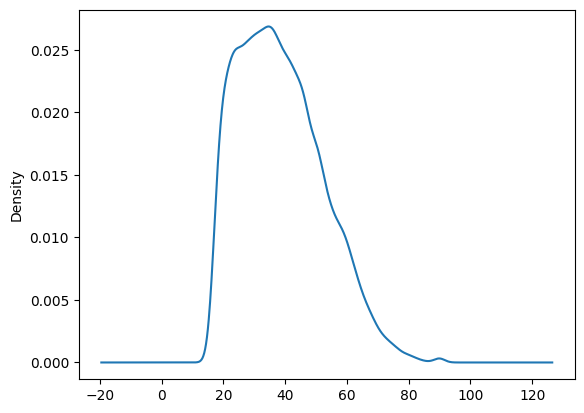

In [6]:
#checking for distribution of the Each Column
df["age"].plot(kind='kde')

In [7]:
#checking for the skewness
df["age"].skew()

0.5587433694130484

In [8]:
df["workclass"].value_counts()
# there is question mark in this column which should be replaced by nan,not only in this column in manyother columns as well

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [9]:
df=df.apply(lambda x:x.str.strip() if x.dtype=="object" else x)
#stripping leading and trailing space

In [10]:
df.replace("?",np.NaN,inplace=True)
#replacing "?" values by nan values 

In [11]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [12]:
df.isnull().sum()
# now we can see null values in three columns 

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [13]:
#importing categorical imputer as there are null values only in categories
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")

In [14]:
#imputing missing values from columns
df["workclass"]=imp.fit_transform(df["workclass"].values.reshape(-1, 1))
df["occupation"]=imp.fit_transform(df["occupation"].values.reshape(-1, 1))
df["country"]=imp.fit_transform(df["country"].values.reshape(-1, 1))

In [15]:
df.isnull().sum()
# again checking for null values after imputing 

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [16]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [17]:
df["workclass"]

0               State-gov
1        Self-emp-not-inc
2                 Private
3                 Private
4                 Private
               ...       
32556             Private
32557             Private
32558             Private
32559             Private
32560        Self-emp-inc
Name: workclass, Length: 32561, dtype: object

<AxesSubplot: ylabel='workclass'>

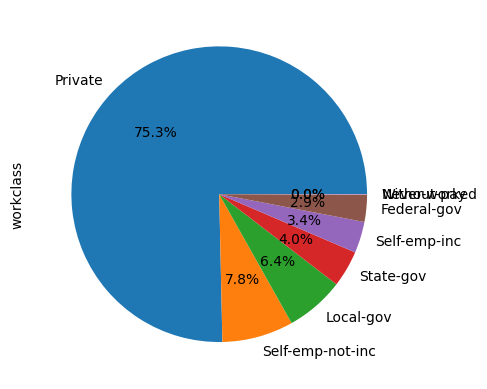

In [18]:
df["workclass"].value_counts().plot(kind="pie",autopct='%0.1f%%')

<AxesSubplot: ylabel='Density'>

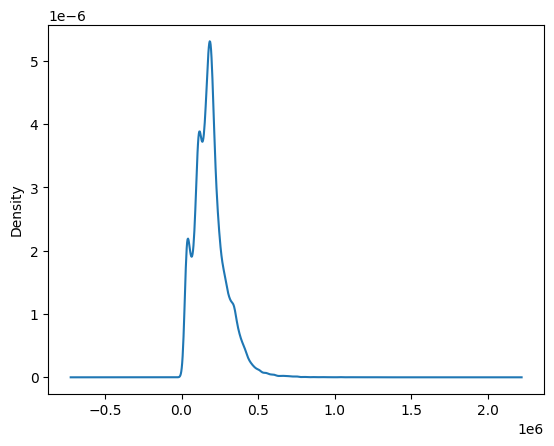

In [19]:
# here fnlwgt is final weight 
df["fnlwgt"].plot(kind="kde")

In [20]:
df["fnlwgt"].skew()

1.4469800945789826

<AxesSubplot: >

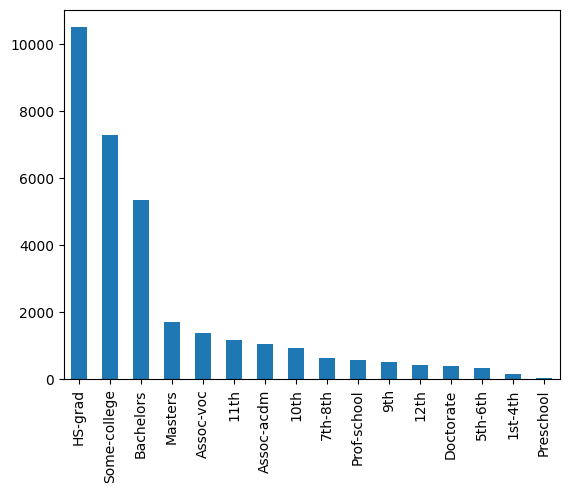

In [21]:
df["education"].value_counts().plot(kind="bar")

In [22]:
df["education-num"].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

In [23]:
#since education and education_num represents same, we can drop education column

In [24]:
df.drop(["education"],axis=1,inplace=True)

In [25]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<AxesSubplot: ylabel='Density'>

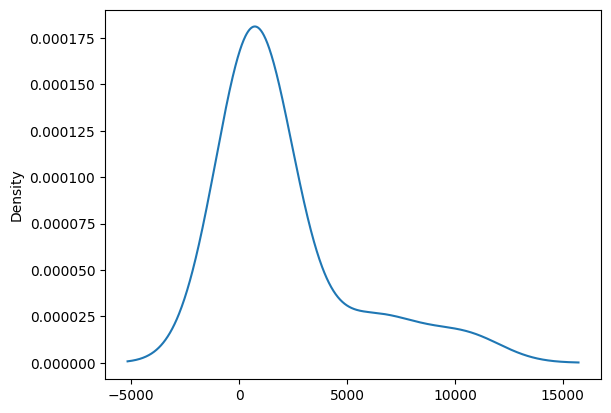

In [26]:
df["education-num"].value_counts().plot(kind="kde")

In [27]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<AxesSubplot: >

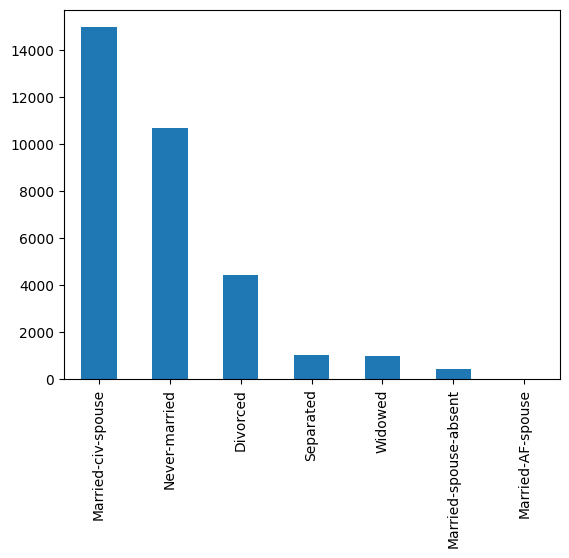

In [28]:
df["marital-status"].value_counts().plot(kind="bar")

<AxesSubplot: >

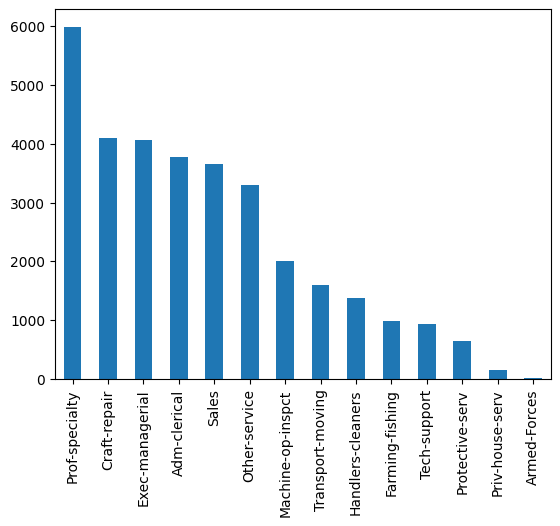

In [29]:
df["occupation"].value_counts().plot(kind="bar")

<AxesSubplot: >

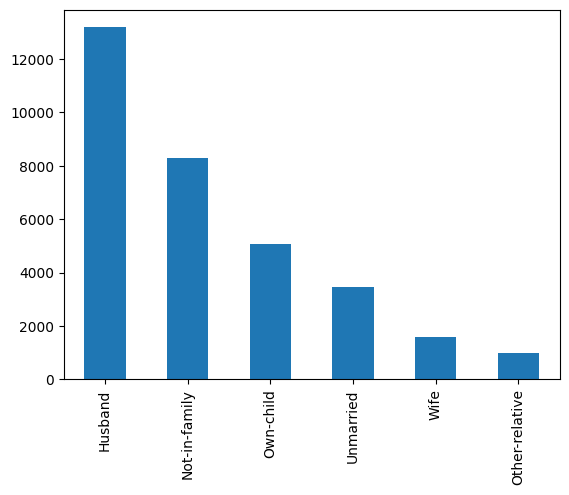

In [30]:
df["relationship"].value_counts().plot(kind="bar")

<AxesSubplot: >

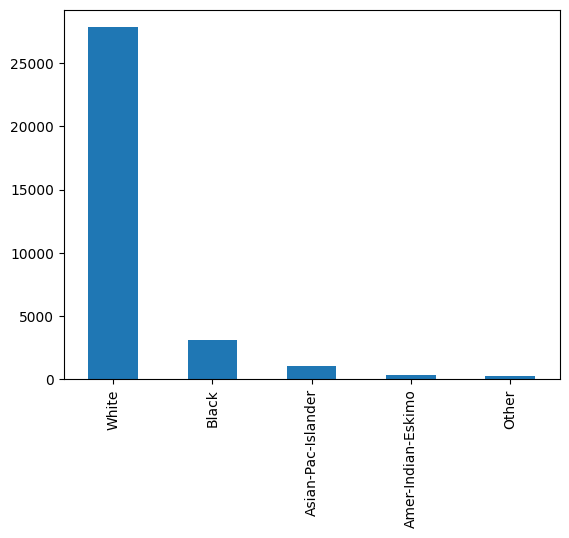

In [31]:
df["race"].value_counts().plot(kind="bar")

<AxesSubplot: >

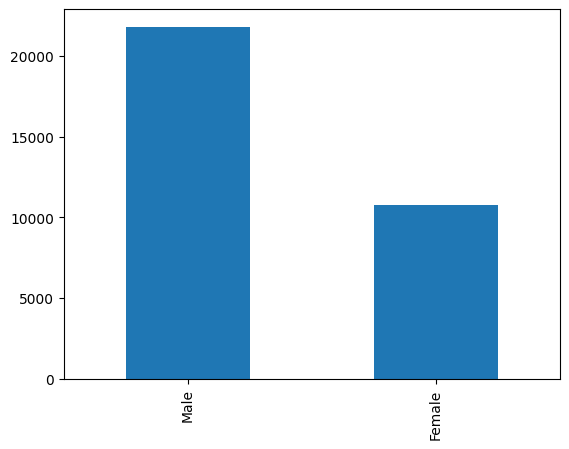

In [32]:
df["sex"].value_counts().plot(kind="bar")

<AxesSubplot: ylabel='Density'>

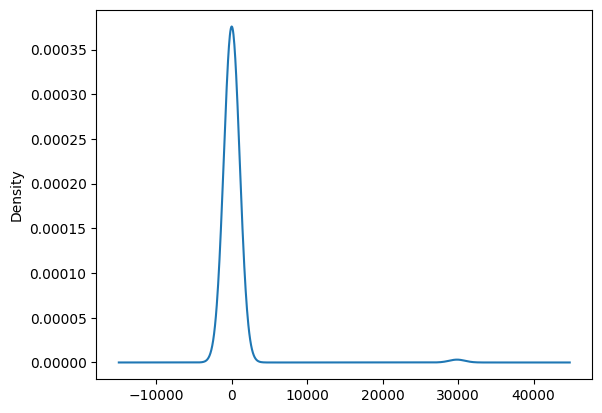

In [33]:
df["capital-gain"].value_counts().plot(kind="kde")

<AxesSubplot: ylabel='Density'>

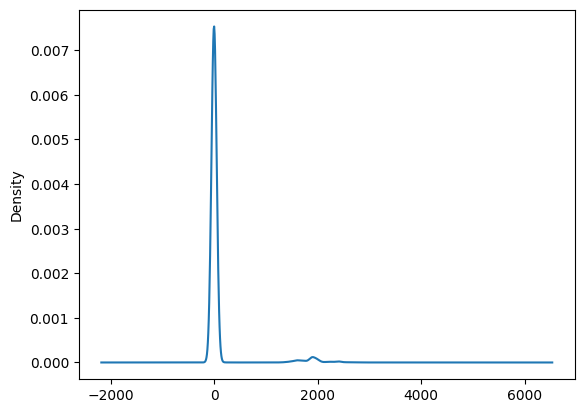

In [34]:
df["capital-loss"].plot(kind="kde")

<AxesSubplot: ylabel='Density'>

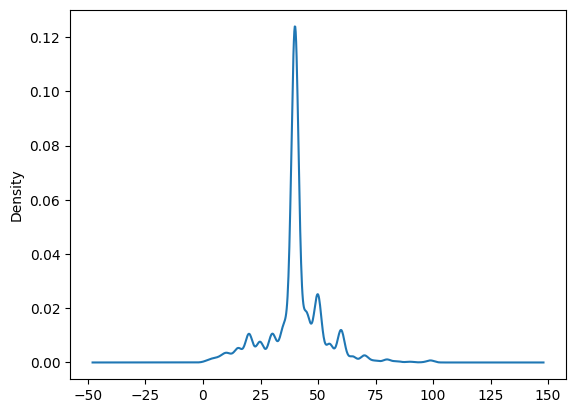

In [35]:
df["hours-per-week"].plot(kind="kde")

<AxesSubplot: >

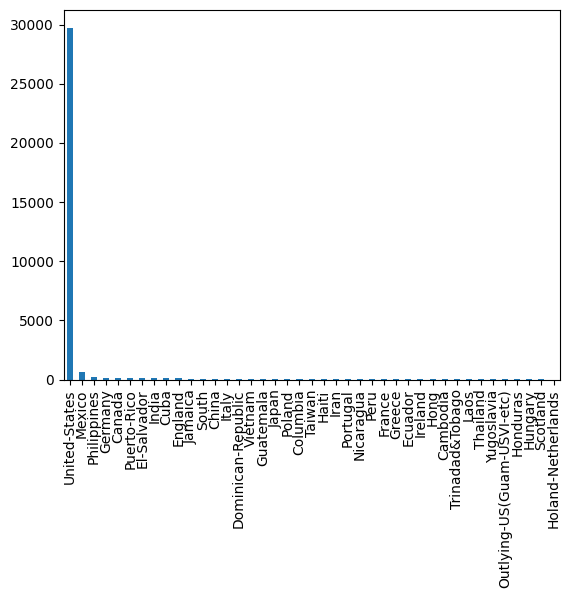

In [36]:
df["country"].value_counts().plot(kind="bar")

<AxesSubplot: ylabel='salary'>

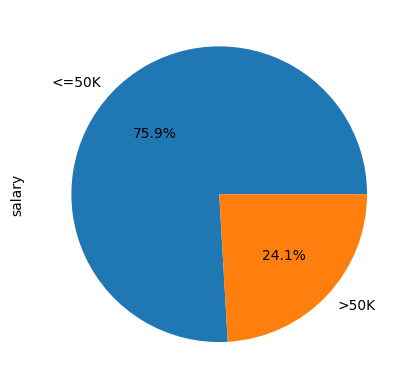

In [37]:
df["salary"].value_counts().plot(kind="pie",autopct="%0.1F%%")

In [38]:
#segregating categorical datatype
cat_df=df.select_dtypes(include=["object"]).copy()

In [39]:
cat_df

,workclass,marital-status,occupation,relationship,race,sex,country,salary
0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...
32556,Private,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [40]:
cat_df["salary"].nunique()

2

In [41]:
cat_df["salary"]=cat_df["salary"].map({"<=50K":0,">50K":1})
#replpacing 0 in case of salary <=50K and 1 in case of salary >50K

In [42]:
cat_df

,workclass,marital-status,occupation,relationship,race,sex,country,salary
0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0
2,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0
...,...,...,...,...,...,...,...,...
32556,Private,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,0
32557,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,1
32558,Private,Widowed,Adm-clerical,Unmarried,White,Female,United-States,0
32559,Private,Never-married,Adm-clerical,Own-child,White,Male,United-States,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'cat_df' is a Pandas DataFrame with categorical columns
# Assuming 'df' is the original DataFrame that includes the "salary" column
ohe = OneHotEncoder()

# Extract the "salary" column from the original DataFrame
salary_column = cat_df["salary"]

# Drop the "salary" column from the original DataFrame
cat_df = cat_df.drop("salary", axis=1)

# Perform one-hot encoding on the DataFrame without the "salary" column
cat_df_encoded = ohe.fit_transform(cat_df)

# Get feature names from the encoder
feature_names = ohe.get_feature_names_out(cat_df.columns)

# Convert the one-hot encoded matrix to a Pandas DataFrame with column names
cat_df_encoded_df = pd.DataFrame(cat_df_encoded.toarray(), columns=feature_names)

# Concatenate the "salary" column back to the DataFrame
cat_df_encoded_df["salary"] = salary_column

# Display the resulting DataFrame
cat_df_encoded_df

In [44]:
cat_df_encoded_df

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,...,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia,salary
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
32557,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
32558,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
32559,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [45]:
df["country"].nunique()

41

In [46]:
cat_df_encoded_df.columns

Index(['workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-family',
       'relation

In [47]:
#segregating numerical datatype
num_df=df.select_dtypes(include=["int64"]).copy()

In [48]:
num_df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
ss=StandardScaler()

In [51]:
num_df_scaled=ss.fit_transform(num_df)

In [52]:
num_df_scaled=pd.DataFrame(num_df_scaled,columns=num_df.columns)
#converting to DataFrame

In [53]:
num_df_scaled

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [54]:
#combining both numerical and categorical dataframe
final_df=pd.concat([num_df_scaled,cat_df_encoded_df],axis=1)

In [55]:
final_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia,salary
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [56]:
#seperating feature column and target column
X=final_df.drop(["salary"],axis=1)
y=final_df["salary"]

In [57]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

<AxesSubplot: ylabel='Frequency'>

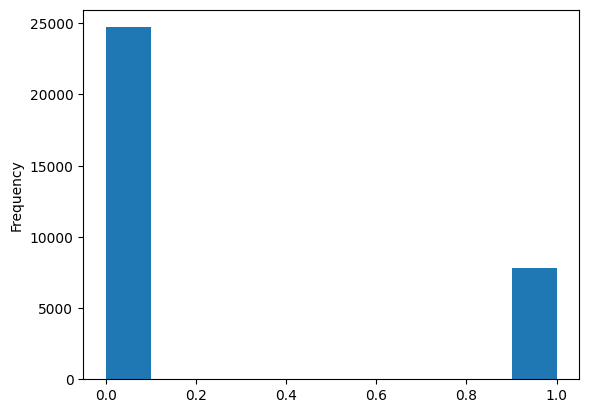

In [58]:
#checking if the target column is balanced or not
y.plot(kind="hist")

In [59]:
#since it is not balanced we need to balance it hence we use random sampling to balance it
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()

In [60]:
X, y = ros.fit_resample(X, y)

In [61]:
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49435,1.790173,1.801654,1.134739,-0.145920,-0.21666,-0.035429,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
49436,0.543859,1.355830,1.134739,0.842275,-0.21666,1.989315,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
49437,1.643547,-0.866223,2.300838,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49438,-0.115955,0.841298,-0.420060,-0.145920,-0.21666,1.584366,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [62]:
y

0        0
1        0
2        0
3        0
4        0
        ..
49435    1
49436    1
49437    1
49438    1
49439    1
Name: salary, Length: 49440, dtype: int64

<AxesSubplot: ylabel='Frequency'>

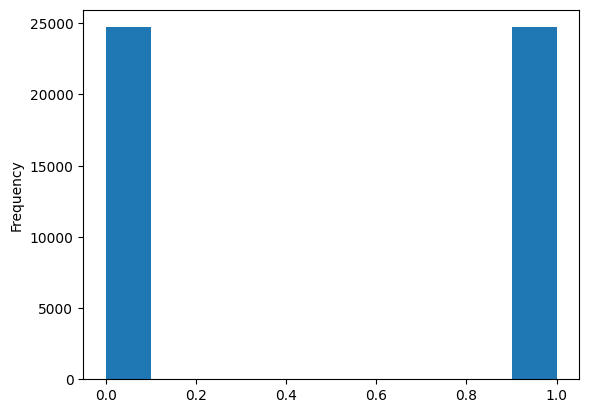

In [63]:
y.plot(kind="hist")
# now we can conclude that no os zeros is almost equal to no of ones

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression 

In [67]:
lr=LogisticRegression(penalty='l2',C=3,verbose=1,solver='liblinear')
#just a random hyperparameter

In [68]:
lr.fit(X_train,y_train)

[LibLinear]

LogisticRegression(C=3, solver='liblinear', verbose=1)

In [69]:
X_train.shape

(33124, 89)

In [70]:
y_train.shape

(33124,)

In [71]:
X_test.shape

(16316, 89)

In [72]:
y_test.shape

(16316,)

In [73]:
y_pred1=lr.predict(X_test)

In [74]:
y_pred1

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(y_pred1,y_test)

0.8219539102721255

In [77]:
# In this problem statement there are no much significance of precesion,recall,roc_auc_score but still we perform it 
# because of learning purpose .

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [79]:
conf_mat = confusion_matrix(y_test,y_pred1)

In [80]:
conf_mat

array([[6572, 1642],
       [1263, 6839]], dtype=int64)

In [81]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [82]:
# Precison means what proportions of predicted positives are Truely positives                                                                                                                      
Precision = true_positive/(true_positive+false_positive)
Precision

0.8000973946919893

In [83]:
# Recall means what proportions of actual values are correctly classified.
Recall = true_positive/(true_positive+false_negative)
Recall

0.8388002552648373

In [84]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8189918374976632

In [85]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred1)
auc

0.8221049797454023

In [86]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

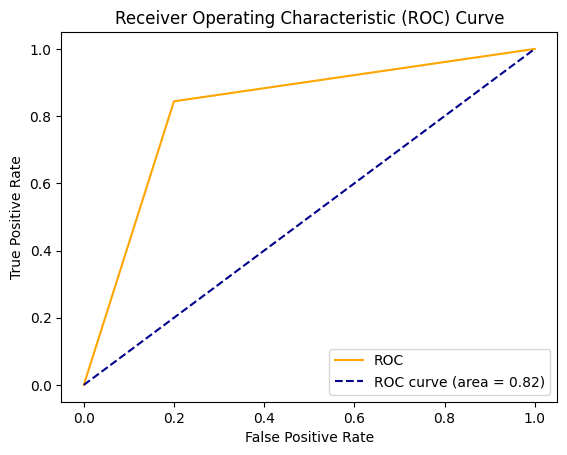

In [87]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [152]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100,150]}

# Create a GridSearchCV object
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy',n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)


[LibLinear]Best Hyperparameters: {'C': 100}
Best Accuracy: 0.8222738492389026


## SVC

In [170]:
from sklearn.svm import SVC

In [171]:
svc=SVC(kernel='poly')

In [172]:
svc.fit(X_train,y_train)

SVC(kernel='poly')

In [173]:
y_pred2=svc.predict(X_test)

In [174]:
y_pred2

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [177]:
accuracy_score(y_pred2,y_test)

0.8383182152488355

In [ ]:
# In this problem statement there is no importance of as per client but still for learning purpose we are checking the 
# Precesion,recall,f1-score

In [178]:
conf_mat = confusion_matrix(y_test,y_pred2)

In [179]:
conf_mat

array([[6489, 1725],
       [ 913, 7189]], dtype=int64)

In [180]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [181]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.7899926953981008

In [182]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8766549581194272

In [183]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8310706967213115

In [184]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred2)
auc

0.8386522351342516

In [185]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)

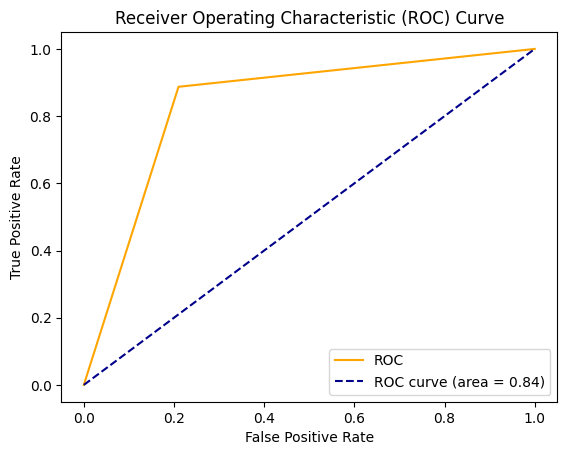

In [186]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy',n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_


## Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rfc=RandomForestClassifier()

In [90]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [91]:
y_pred3=rfc.predict(X_test)

In [92]:
y_pred3

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [93]:
accuracy_score(y_pred3,y_test)

0.921181662172101

In [175]:
conf_mat = confusion_matrix(y_test,y_pred3)

In [176]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [177]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8772826880934989

In [178]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9640133779264214

In [179]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9186053923130856

In [180]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred3)
auc

0.922040504747811

In [181]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)

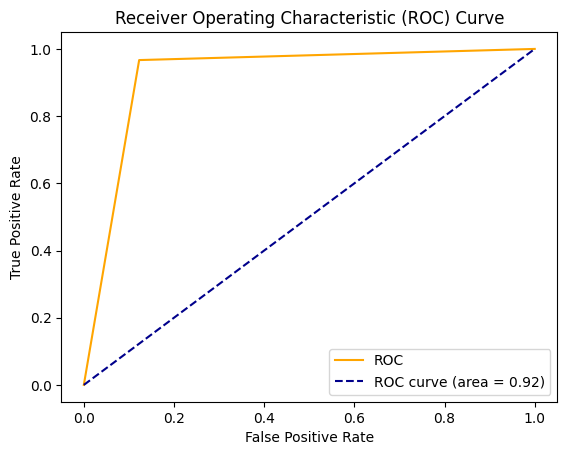

In [182]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [191]:
from sklearn.model_selection import GridSearchCV


In [194]:
param_grid = {
    'n_estimators': [20, 60, 100, 150],
    'max_depth': [None, 2, 4, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [195]:
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, scoring='accuracy',verbose=2,n_jobs=-1)


In [196]:
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Hyperparameters: {'n_estimators': 60, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}
Best Accuracy: 0.8826227645611157


### Gradient Boosting

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

In [95]:
gbc=GradientBoostingClassifier()

In [96]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [97]:
y_pred4=gbc.predict(X_test)

In [98]:
y_pred4

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [99]:
accuracy_score(y_pred4,y_test)

0.8416891394949743

In [204]:
conf_mat = confusion_matrix(y_test,y_pred4)

In [205]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [206]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8158022887752617

In [207]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8640876853642812

In [208]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8392510489072577

In [209]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred4)
auc

0.8428554766512695

In [210]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred4)

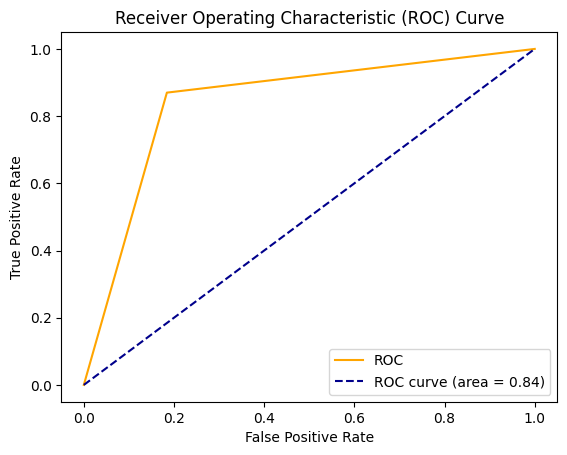

In [211]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### XG Boost

In [212]:
from xgboost import XGBClassifier

In [213]:
xgb = XGBClassifier(n_estimators=50, max_depth=15, learning_rate=0.1, objective='binary:logistic')

In [214]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [215]:
y_pred5=xgb.predict(X_test)

In [216]:
y_pred5

array([1, 0, 1, ..., 0, 0, 1])

In [217]:
accuracy_score(y_pred5,y_test)

0.8932336356950233

In [225]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5, scoring='accuracy',verbose=2,n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Best Accuracy: 0.8838303618630936


## Naive Bayes

In [218]:
from sklearn.naive_bayes import GaussianNB

In [219]:
nb=GaussianNB()

In [220]:
nb.fit(X_train,y_train)

GaussianNB()

In [221]:
y_pred6=nb.predict(X_test)

In [222]:
accuracy_score(y_pred6,y_test)

0.6834395685216965

### The Best Accuracy score of Logistic Regression is =  0.823
### The Best Accuracy score of SVC is =  0.84
### The Best Accuracy score of Random Forest is =  0.92
### The Best Accuracy score of Gradient Boosting is =  0.841
### The Best Accuracy score of XG Boosting is =  0.883
### The Best Accuracy score of Naive Bayes is =0.683
### We can use Random forest Algorithm for this perticular problem statement since the accuracy score is good when compared with other algorithm.

In [103]:
# serilizing the model and saving it.
from joblib import dump, load
dump(rfc, 'filename.joblib')

['filename.joblib']

In [104]:
Loading the saved model to predict the salary of the person
rfc_test = load('filename.joblib')

##                                                             Thank You 